In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
import sigutils

Here is a basic Bode plot using `scipy.signal` to generate the transfer function.

(<matplotlib.figure.Figure at 0x10b805e10>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x1084dd350>,
  <matplotlib.axes._subplots.AxesSubplot at 0x126b38910>))

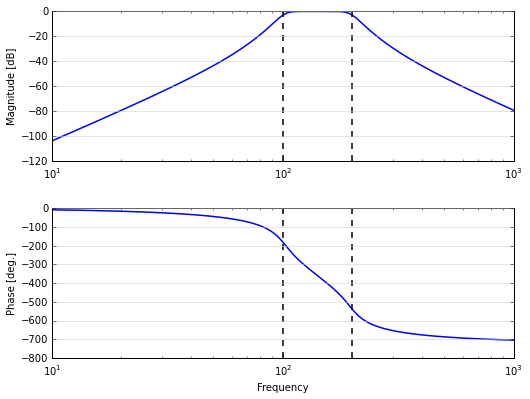

In [29]:
sigutils.bode_sys(signal.butter(4, [100*2*np.pi, 200*2*np.pi], analog=True, btype='bandpass'), xlim=(10, 1000), gain_point=-3)

Here is a plot using `bode_syss` to plot multiple transfer functions on the same graph.

(<matplotlib.figure.Figure at 0x127f5d950>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x127f5d990>,
  <matplotlib.axes._subplots.AxesSubplot at 0x12814b950>))

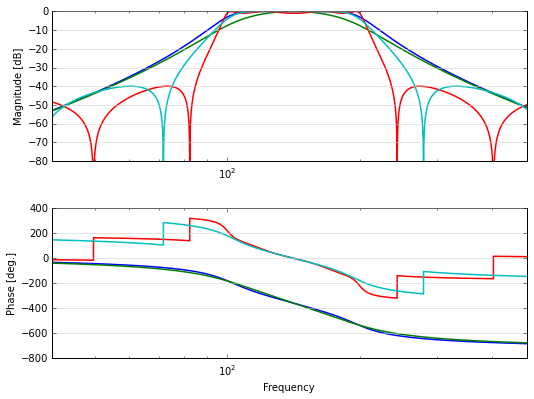

In [30]:
butter = signal.butter(4, [100*2*np.pi, 200*2*np.pi], analog=True, btype='bandpass')
bessel = signal.bessel(4, [100*2*np.pi, 200*2*np.pi], analog=True, btype='bandpass')
ellip  =  signal.ellip(4, 1, 40, [100*2*np.pi, 200*2*np.pi], analog=True, btype='bandpass')
cheb2  = signal.cheby2(4, 40, [100*2*np.pi*0.75, 200*2*np.pi/0.75], analog=True, btype='bandpass')
sigutils.bode_syss((butter, bessel, ellip, cheb2), xlim=(40, 480), mag_lim=(-80, 0, 10),)